<a href="https://colab.research.google.com/github/Andrew-Hess/Computing_github/blob/Main/Finalproject3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3: machine learning analysis of a superconductors' database


In this project you will greatly expand your familiarity with machine learning applications to scientific problems, by exploring a large dataset of superconducting materials, i.e. materials that conduct electricity without resistance.

The specific datasets of interest for this project, *train* and *unique_m* are available in CSV format in the Canvas module dedicated to this project. You can find the full code and documentation [here](https://github.com/khamidieh/predict_tc). This GitHub repository is the computational basis of the paper [A Data-Driven Statistical Model for Predicting the Critical Temperature of a Superconductor](https://arxiv.org/abs/1803.10260) by Kam Hamidieh. 


The dataset *unique_m* contains , for each row, the chemical formula of several superconducting materials, and the critical temperature at which they manifest superconducting properties. The chemical formula is broken up in a row of concentrations associated to each chemical element in the material.

The dataset *train* contains in each row a list of relevant chemical properties that can be calculated from first principles for the materials (and the critical temperature as well).

(1) Create training and testing datasets by generating two random subsets of the rows of the dataset *train* (excluding the critical temperature values). Create corresponding training and testing targets of critical temperatures.

Use the *regressors* of *scikit-learn* to generate machine learning predictors of the critical temperature. Evaluate the accuracy of your predictions.

(2) Repeat the steps in (1), but by substituting the *train* dataset with the dataset *unique_m*. 

(3) Compare the accuracy of the results you get in (1) and (2) and comment on your results.

(4) Repeat the analysis in (1)-(3), but replacing the regressors from *scikit-learn* with the corresponding deep learning neural network regressors that you can build with the Keras and TensorFlow Python packages. Refer to [this Jupyter notebook tutorial](https://www.tensorflow.org/tutorials/keras/regression) to learn how to build regressors in Keras.

(5) Search the literature to find out what is the current state of machine learning approaches to the estimation of  superconductors' critical temperatures. Compare with your results for this project and suggest possible improvements to your code. 

 


N. B. the basic structure for this project is the same as the one for HW4 (outlined in HW4_Question1_template and HW4_Question2_template). Just remember that the work you did for HW4 was about *classifiers*, while here you will be working with *regressors*. The main difference is that your targets will take continuous values when you are building a regressor (as opposed to discrete, categorical values for classifiers). 

N. B. 2 after you import your csv data sets, and after you convert them in numpy arrays (that start with index 0!), change the critical temperature of row 20573 to 60. There is a typo in the dataset.

This is a [very basic tutorial](https://www.kaggle.com/andyxie/beginner-scikit-learn-linear-regression-tutorial) on (linear) regression with scikit-learn, and this is [a more complete tutorial](https://developer.ibm.com/tutorials/learn-regression-algorithms-using-python-and-scikit-learn/) that lists several possible regressors in scikit-learn.  

In [1]:
#This is one project that is best done working on Colab.
# You will need the following two lines when reading files from your
# Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project3/train.csv')
y_df = np.array(train["critical_temp"]) #critical temp
x_df = train.iloc[:,:-1] #everything else
y_df[20573] = 60 #fix mistake in code

The code above shows how I created the first split in the dataset. train would be the dataset with everything and I used that to create, y_df which only has "critical tempurature" and x_df which has everything else.

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2,random_state=1)#code that splits the datasets

The code above shows the new function that we had to learn to split the data even further. With test_size, we split the data at 20% for the testing sets and 80% and training sets.

0.7259853810482528


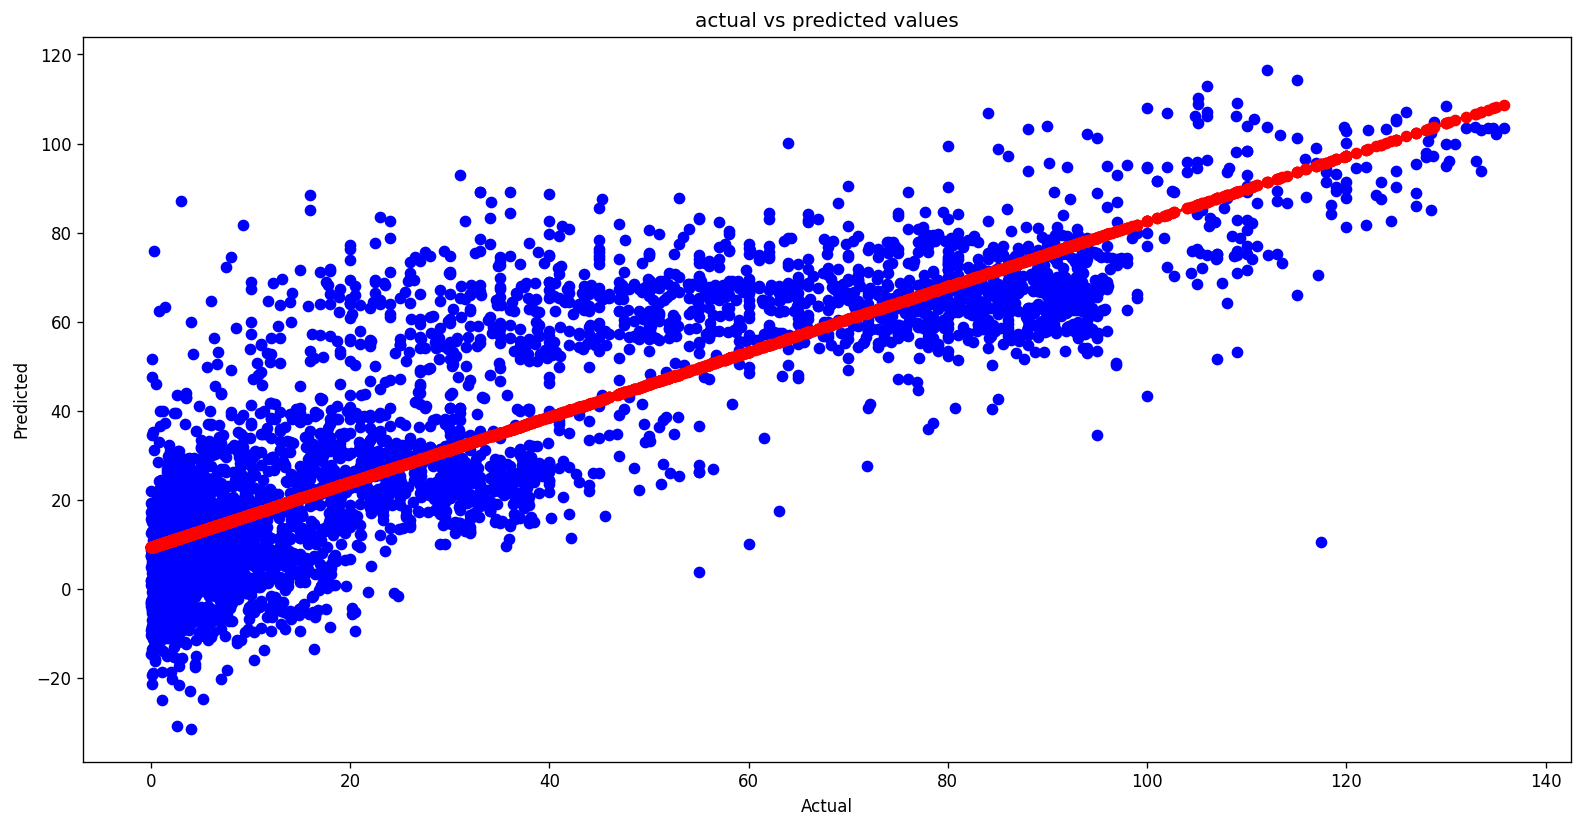

In [4]:
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
from matplotlib.pyplot import figure

regr = LinearRegression() #linear regression
regr.fit(x_train, y_train) #fitting the regression with the train functions.
print(regr.score(x_test, y_test)) #getting the score of the regressions (0.725)
y_pred = regr.predict(x_test) #Getting predictiuon for y_pred from the x_test
figure(figsize=(16, 8), dpi=120)#changing the graph to a more appropriate size.
plt.scatter(y_test,y_pred, color ='blue') #plotting function with these bounds
z = np.polyfit(y_test,y_pred, 1) #creating trendline
p = np.poly1d(z) #creating trendline
plt.plot(y_test, p(y_test), "r-o")#creating trendline
plt.title("actual vs predicted values")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show() #showing the plot

linear regression is a way to model relationships in a linear matter. the relationship between the points should be linear to create a more accurate result. The calculation of linear regression is done by linear approximation. The formula for linear approximation is y=f(a)+f'(a)(x-a)\. Though this relationship above does seem linear but there may be a better approximation for it instead of using linear regression. The dataset is too spread apart to get a better result.




The code above shows a scatter plot of the predicted vs actual values. I used code similar to homework 3. Then I used 
z = np.polyfit(y_test,y_pred, 1) 
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r-o")
to create the trendline.

In [5]:
import plotly.express as px #same code as above but with a dataframe and a trendline
from sklearn.datasets import load_iris
LR_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
LR_df.head()
fig = px.scatter(LR_df, x="Actual", y="Predicted",trendline="ols")
fig.show()

In [6]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project3/train.csv')
y_df2 = np.array(df2["critical_temp"]) #critical temp
x_df2 = df2.iloc[:,:-2] #everything else
y_df2[20573] = 60 #fix mistake in code

In [7]:
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(x_df2, y_df2, test_size=0.2,random_state=1)#code that splits the datasets

0.8598969970271383


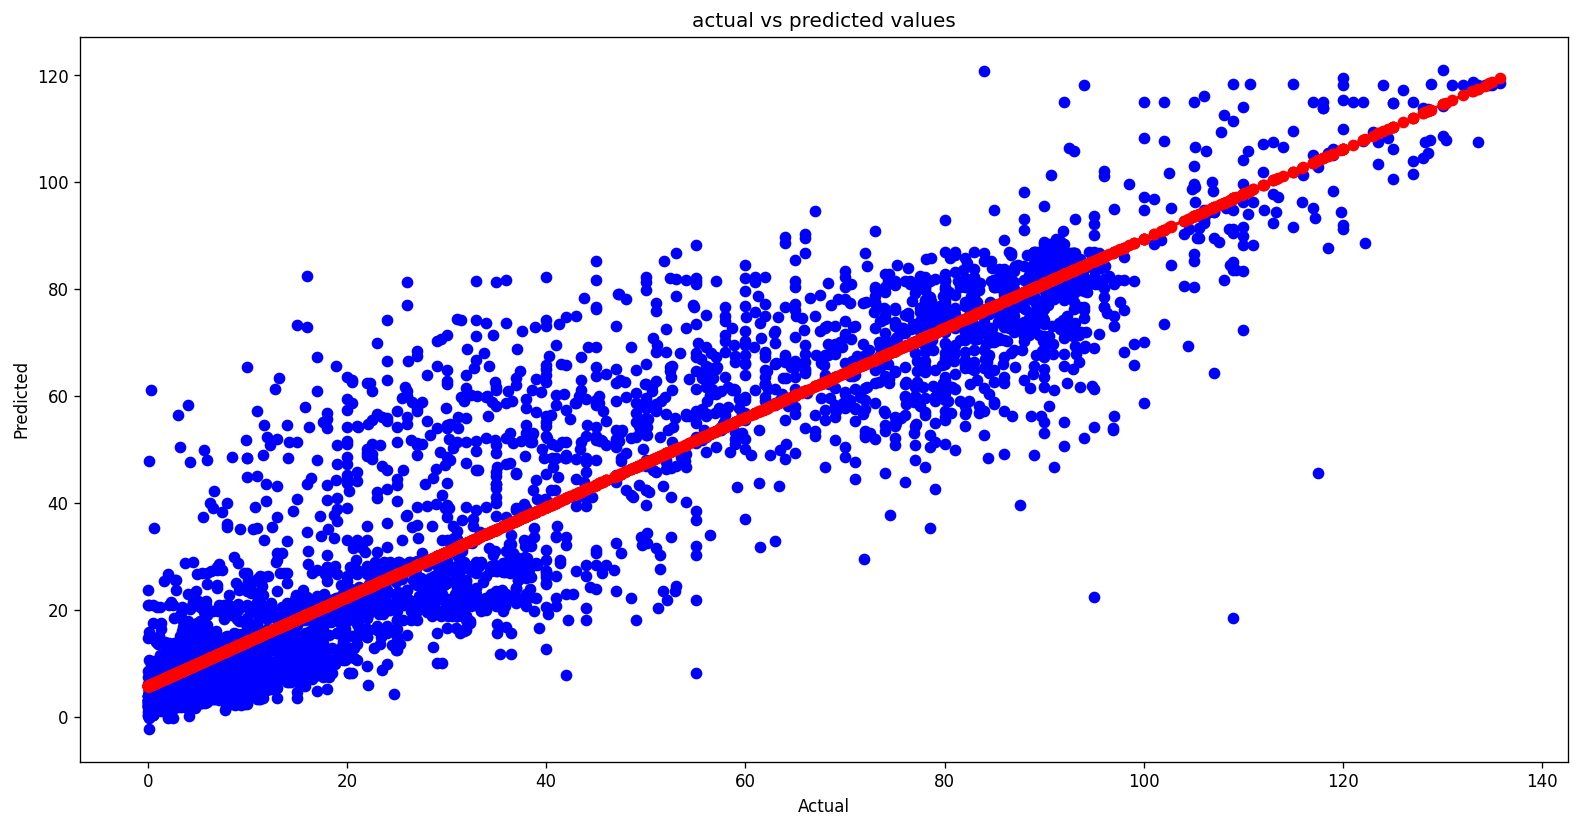

In [8]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

reg = GradientBoostingRegressor(random_state=0)
reg.fit(x2_train, y2_train)
y2_pred = reg.predict(x2_test)
figure(figsize=(16, 8), dpi=120)#changing the graph to a more appropriate size.
print(reg.score(x2_test, y2_test))
plt.scatter(y2_test,y2_pred, color ='blue') #plotting function with these bounds
z = np.polyfit(y2_test,y2_pred, 1) #creating trendline
p = np.poly1d(z) #creating trendline
plt.plot(y_test, p(y_test), "r-o")#creating trendline
plt.title("actual vs predicted values")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show() #showing the plot

Gradient boosting Regression calculates the difference between the current prediction and the known correct target value. The algorithm used to calculate the gradient boosting is:
$L = \frac{1}{n}\displaystyle\sum\limits_{i=0}^n (y_{i} - \gamma_{i})^2$

Here $y_{i}$ is the observed value, and $\gamma_{i}$ is the predicted value. We use the formula by differentiating it and setting L=0 to find predited value of gamma. 


The code above shows us the scatterplot of the predicted vs actual values. The score of the gradient booding was actually very promising. It is a good value of 0.859 on a scale from 0-1. Of 1 being the best and 0 being the worst. Now that we are working with Keras I would like to see the difference between the score of the gradient boosting compared to a regressor that forms around the data like keras.

By the way everything below this point is kind of like scatch code and testing to see what works and familiarizing myself with keras.

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

I think it will be easier for me to format everything the way that the tutorial does.

In [10]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project3/train.csv')

In [11]:
nomer = x2_train.columns.tolist()

In [12]:
df3[81,20573] = 60 #fix mistake in code

In [13]:
train_dataset = df3.sample(frac=0.8, random_state=0)
test_dataset = df3.drop(train_dataset.index)

In [14]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('critical_temp')
test_labels = test_features.pop('critical_temp')

In [15]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [16]:
normalizer.adapt(np.array(train_features))

In [17]:
print(normalizer.mean.numpy())

[[10644.792     4.116    87.516    72.936    71.245    58.484     1.166
      1.063   115.679    33.335    44.398    41.428   769.213   870.237
    737.194   832.611     1.3       0.926   570.906   483.954   215.064
    223.759   157.961   134.659   144.473   120.948     1.268     1.131
    139.176    51.443    51.522    52.3    6106.244  5262.261  3459.948
   3118.264     1.073     0.856  8669.154  2906.115  3417.419  3318.837
     76.739    92.702    54.182    72.351     1.07      0.77    120.579
     59.403    48.854    44.387    14.345    13.923    10.182    10.208
      1.093     0.914    21.248     8.265     8.366     7.756    89.772
     81.499    30.056    27.464     0.731     0.542   250.533    61.872
     98.76     96.022     3.196     3.151     3.054     3.054     1.296
      1.052     2.044     1.485     0.841     0.675    60.   ]]


In [18]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[19620.       9.     106.88    53.69    81.89    34.72     1.98     1.83
    192.98    14.11    68.24    54.82   746.4   1004.9    720.02   941.26
      2.16     1.08   764.1    706.47   222.81   339.43   160.44   107.96
    149.26    87.2      2.14     1.76   174.      30.2     48.96    68.47
   6429.49  3022.32  2406.49    62.97     1.95     1.47 11848.57  1370.8
   3853.05  4139.77    50.71    99.18    21.78    57.55     1.67     0.71
    141.      76.72    51.17    58.66     8.08     4.34     5.67     1.2
      2.03     1.53    13.58     1.99     4.03     4.93   100.34    82.98
     27.18     1.21     1.6      0.92   399.97    61.22   120.08   142.54
      2.67     2.11     2.53     2.09     2.14     1.52     3.       1.07
      0.94     0.38    60.  ]]

Normalized: [[ 1.47  3.39  0.65 -0.58  0.34 -0.65  2.24  1.89  1.41 -0.71  1.19  0.67
  -0.26  0.94 -0.22  0.91  2.25  0.47  0.62  1.    0.07  0.9   0.12 -0.93
   0.22 -0.94  2.33  1.54  0.52 -0.61 -0.11  0.64  0.11

In [19]:
from keras.optimizers import SGD
opt = SGD(learning_rate=0.01, momentum=0.9, decay=0.01)
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(5000, activation='relu'),
      layers.Dense(5000, activation='relu'),
      layers.Dense(5000, activation='relu'),
      layers.Dense(5000, activation='relu'),
      layers.Dense(5000, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(loss='mean_absolute_error',
                optimizer=opt,
                metrics=['accuracy'])
  return model

In [20]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 83)               167       
 n)                                                              
                                                                 
 dense (Dense)               (None, 5000)              420000    
                                                                 
 dense_1 (Dense)             (None, 5000)              25005000  
                                                                 
 dense_2 (Dense)             (None, 5000)              25005000  
                                                                 
 dense_3 (Dense)             (None, 5000)              25005000  
                                                                 
 dense_4 (Dense)             (None, 5000)              25005000  
                                                        

In [21]:
from keras.callbacks import ReduceLROnPlateau
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100,
    callbacks=[rlrop])

133/133 [==============================] - 15s 114ms/step


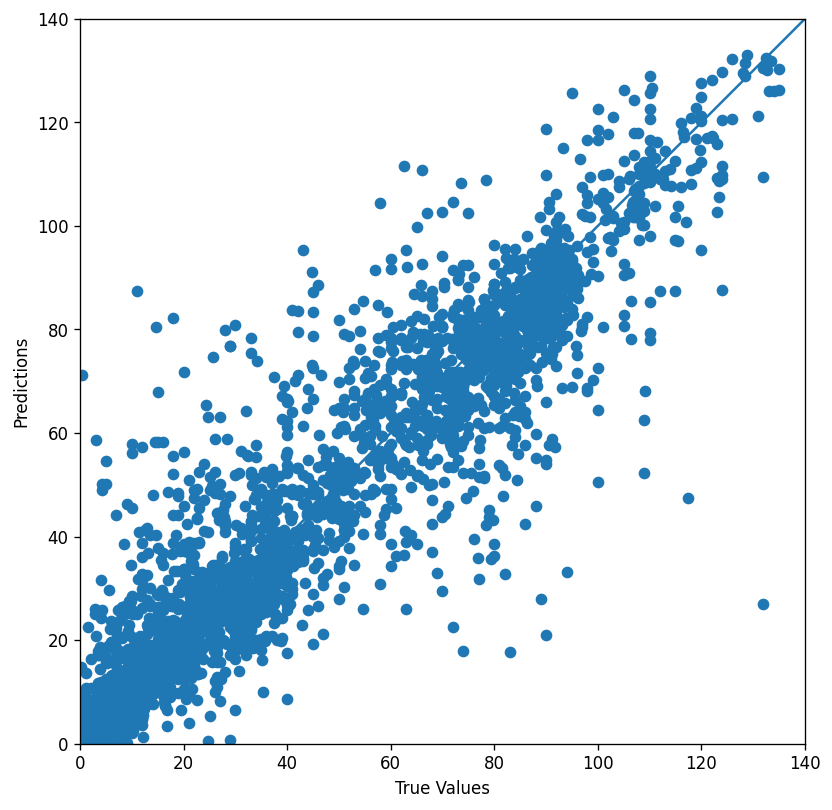

In [22]:
test_predictions = dnn_model.predict(test_features).flatten()
figure(figsize=(16, 8), dpi=120)
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 140]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Keras is a deep learning API for implementing neural networks. For this project we are predicting the tempurature of superconductor materials using different characteristics of the conductors, and how they relate to the temperature used to superconduct. This model reflects the work of Keras for 8 hours. The result from Keras looks to be the most successful in creating a prediction for the tempurature of superconductors.

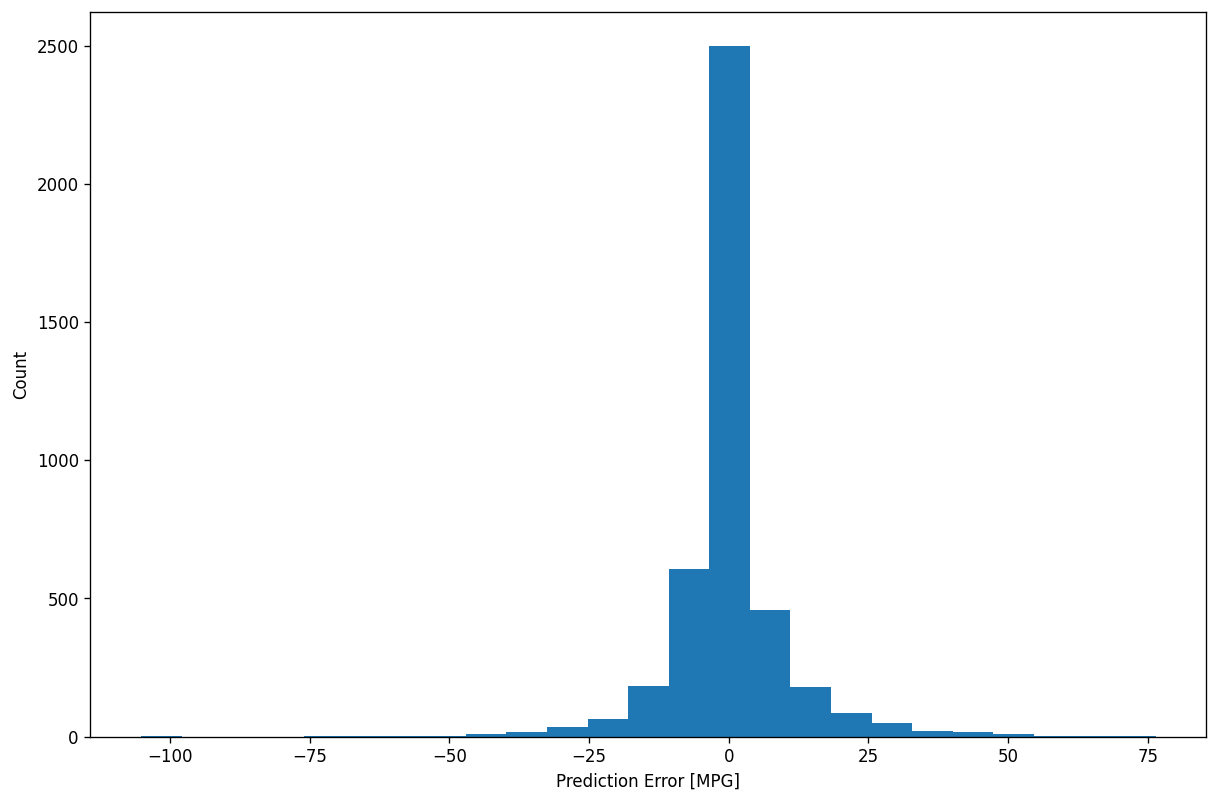

In [23]:
error = test_predictions - test_labels
figure(figsize=(12, 8), dpi=120)
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

The histogram shows the error distribution. It does seem to have a lot of error but the dataset we are working with is exceptionally large so that's expected. I think the model did a great job predicting.


In [24]:
accuracy = dnn_model.evaluate(train_features,train_labels)

532/532 [==============================] - 56s 105ms/step - loss: 4.7421 - accuracy: 0.0015


In [25]:
print(dnn_model.metrics_names)
print(accuracy)

['loss', 'accuracy']
[4.742061614990234, 0.0015285126864910126]


Loss is a number that symbolizes the total of our model's mistakes. It gauges the performance of our model. The loss will be considerable if the mistakes are high, indicating that the model does not perform well. Otherwise, our model performs better the lower it is. 5 is reasonable low for the situation.

In [26]:
dnn_model.save('dnn_model')